### Keras with Neural Network


In [80]:
from keras.models import Sequential
from keras.layers import Dense

In [81]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)), # Hidden layer
    Dense(5, activation='relu'),    # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
]
)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

### Tensorflow with Neural Network


In [83]:
import tensorflow as tf

# Define a simple Sequential model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Print the model summary
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
import tensorflow as tf

#Define tensors
a = tf.constant([1.0,2.0])
b = tf.constant([3.0, 4.0])


# Perform basic operatins

sum_result = tf.add(a,b)
dot_product = tf.tensordot(a,b, axes=1)

print(f"Sum: {sum_result} " )
print(f"Dot Product : {dot_product}")

Sum: [4. 6.] 
Dot Product : 11.0


In [85]:
import tensorflow as tf

# Define a simple neural network using Tensorflow low level API

class SimpleNN(tf.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.w = tf.Variable(tf.random.normal([2,2]), name="weights") # weifht  matix
        self.b = tf.Variable(tf.zeros([2]), name="bias") # bias vector

    def __call__(self, x):
        return tf.nn.relu(tf.matmul(x, self.w) + self.b)  # RelU activation

In [86]:
# creat a model and test it

model = SimpleNN()
input_data = tf.constant([[1.0, 2.0], [3.0, 4.0]])
output = model(input_data)

In [87]:
# output result from model

print("output :", output)


# Display trainable parameters
print("\nTrainable parameters:")
print("weights (w) :")  # Display weights matrix
print("Biases (b) :")
print(model.b.numpy()) # Display the bias vectore

output : tf.Tensor(
[[0.8341261 2.9120588]
 [2.8805761 7.15135  ]], shape=(2, 2), dtype=float32)

Trainable parameters:
weights (w) :
Biases (b) :
[0. 0.]


In [88]:
import torch

# Define tensors
a = torch.tensor([2.0, 3.0])
b = torch.tensor([4.0, 5.0])

# Perform basic operations

sum_result =  a + b
dot_product = torch.dot(a,b)

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim


#Define a simple neural network

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4,8) # Hidden layer
        self.fc2 = nn.Linear (8,10)
        self.fc3 = nn.Linear(10,1) # output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x)) # Apply RelU activation
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x)) # Apply sigmoid activation for output
        return x

# Instantiate the model
model = SimpleNN()

print("Model architecture:")
print(model)

# Example inpurt to test the model
input_data  = torch.rand(1, 4) # Batch size 1 and inpurt  features 4

output = model(input_data)
print(f"\nTrainable Parameters:{output}")


# Print trainable parameters (weights and biases)
print("\nTrainable Parameters:")

for name , param in model.named_parameters():
    print(f"{name}:\n{param.data}")


Model architecture:
SimpleNN(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)

Trainable Parameters:tensor([[0.3897]], grad_fn=<SigmoidBackward0>)

Trainable Parameters:
fc1.weight:
tensor([[-0.1343, -0.1837, -0.2812, -0.3374],
        [-0.1597,  0.3244, -0.3711,  0.4908],
        [ 0.3199,  0.3056, -0.2709, -0.0433],
        [-0.1762, -0.4376, -0.2517,  0.3051],
        [-0.3792,  0.1042, -0.0149,  0.4366],
        [-0.3079, -0.0654, -0.0282,  0.0538],
        [-0.3943,  0.1245,  0.2849,  0.0380],
        [ 0.3358, -0.4403,  0.1024,  0.0619]])
fc1.bias:
tensor([-0.4964, -0.2414, -0.2733, -0.0931, -0.0088, -0.4516, -0.2100,  0.1021])
fc2.weight:
tensor([[-0.2084,  0.0975, -0.1965,  0.1736, -0.0981,  0.1078, -0.0959,  0.1080],
        [-0.0535, -0.1061,  0.3160,  0.3495, -0.0014, -0.3471, -0.3217, -0.2318],
        [-0.2391, -0.0858,  0.3341, -0.2351, -0.1693

### Experiments with IRIS Data with Keras

In [90]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [91]:
# load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

print(x)
print(y)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [92]:

# One-hot encode the labels (since we have 3 classes)
encoder = OneHotEncoder()
y =  encoder.fit_transform(y.reshape(-1,1))

In [93]:
xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state =42) #এর মান সেট করলে প্রতিবার কোড চালানোর সময় একই ডেটা বিভাজন (train-test split) হবে।
# 42 শুধুমাত্র একটি প্রচলিত সংখ্যা; যেকোনো সংখ্যা ব্যবহার করা যায়।

In [94]:
# Standardize the data

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

In [96]:
# Define a simple neural network using Sigmoid activation in all layers
def build_model_sigmoid():
    model = Sequential([
        Dense(10, activation='sigmoid', input_shape=(4,)),  # Hidden layer with Sigmoid
        Dense(10, activation='sigmoid'),  # Another hidden layer with Sigmoid
        Dense(3, activation='softmax')  # Output layer with softmax for classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model_sigmoid = build_model_sigmoid()

ytrain_dense = ytrain.toarray()
ytest_dense = ytest.toarray()

# Train the model
history_sigmoid = model_sigmoid.fit(X_train, ytrain_dense, epochs=50, validation_data=(X_test, ytest_dense), verbose=2)

# Evaluate the model
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(X_test, ytest_dense, verbose=2)
print(f"Test Accuracy (All Sigmoid): {test_acc_sigmoid}")

Epoch 1/50
4/4 - 1s - 272ms/step - accuracy: 0.3250 - loss: 1.3215 - val_accuracy: 0.3667 - val_loss: 1.2534
Epoch 2/50
4/4 - 0s - 21ms/step - accuracy: 0.3250 - loss: 1.3006 - val_accuracy: 0.3667 - val_loss: 1.2368
Epoch 3/50
4/4 - 0s - 21ms/step - accuracy: 0.3250 - loss: 1.2815 - val_accuracy: 0.3667 - val_loss: 1.2213
Epoch 4/50
4/4 - 0s - 24ms/step - accuracy: 0.3250 - loss: 1.2621 - val_accuracy: 0.3667 - val_loss: 1.2074
Epoch 5/50
4/4 - 0s - 22ms/step - accuracy: 0.3250 - loss: 1.2476 - val_accuracy: 0.3667 - val_loss: 1.1943
Epoch 6/50
4/4 - 0s - 24ms/step - accuracy: 0.3250 - loss: 1.2307 - val_accuracy: 0.3667 - val_loss: 1.1827
Epoch 7/50
4/4 - 0s - 25ms/step - accuracy: 0.3250 - loss: 1.2184 - val_accuracy: 0.3667 - val_loss: 1.1717
Epoch 8/50
4/4 - 0s - 21ms/step - accuracy: 0.3250 - loss: 1.2041 - val_accuracy: 0.3667 - val_loss: 1.1620
Epoch 9/50
4/4 - 0s - 21ms/step - accuracy: 0.3250 - loss: 1.1922 - val_accuracy: 0.3667 - val_loss: 1.1529
Epoch 10/50
4/4 - 0s - 25ms

In [100]:
def bulid_model_relu():
    model = Sequential([
        Dense(10, activation='relu', input_shape=(4,)),
        Dense(10, activation='relu'),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_relu = bulid_model_relu()
ytrain_dense = ytrain.toarray()
ytest_dense = ytest.toarray()

history_relu = model_relu.fit(xtrain, ytrain_dense, epochs=50, validation_data=(xtest, ytest_dense))

test_loss, test_acc_relu = model_relu.evaluate(xtest, ytest_dense)

print(f"Test accuracy (All relue): {test_acc_relu}")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.3394 - loss: 1.1903 - val_accuracy: 0.3667 - val_loss: 1.1377
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3404 - loss: 1.1557 - val_accuracy: 0.3667 - val_loss: 1.1032
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3331 - loss: 1.1047 - val_accuracy: 0.3667 - val_loss: 1.0739
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3415 - loss: 1.0705 - val_accuracy: 0.3667 - val_loss: 1.0483
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3633 - loss: 1.0259 - val_accuracy: 0.3667 - val_loss: 1.0263
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2894 - loss: 1.0745 - val_accuracy: 0.3667 - val_loss: 1.0062
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3331 - loss: 1.0047 - val_accuracy: 0.3667 - val_loss: 0.9884
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3237 - loss: 0.9941 - val_accuracy: 0.3667 - val_loss: 0.9710


In [105]:
from tensorflow.keras.layers import LeakyReLU

In [109]:
def build_model_leak_relu():
    model = Sequential([
        Dense(10, input_shape=(4,)),  # First hidden layer without activation, add LeakyReLU separately
        LeakyReLU(alpha=0.01),  # Leaky ReLU activation with small slope for negative values
        Dense(10),  # Second hidden layer
        LeakyReLU(alpha=0.01),  # Leaky ReLU activatio
        Dense(3, activation='softmax')

    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'] )
    return model


model_leaky_relu = build_model_leak_relu()

ytrain_dense = ytrain.toarray()
ytest_dense = ytest.toarray()

history_leaky_relu = model_leaky_relu.fit(xtrain, ytrain_dense, epochs=50, validation_data=(xtest, ytest_dense))

test_loss, test_acc_leaky_relue = model_leaky_relu.evaluate(xtest, ytest_dense)

print(f"Test Accuracy (All Leaky ReLU): {test_acc_leaky_relue}")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3667 - loss: 5.7701 - val_accuracy: 0.3333 - val_loss: 6.2257
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3302 - loss: 5.3803 - val_accuracy: 0.3333 - val_loss: 5.8263
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3000 - loss: 5.5295 - val_accuracy: 0.3333 - val_loss: 5.4541
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3135 - loss: 5.0750 - val_accuracy: 0.3333 - val_loss: 5.1047
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2958 - loss: 4.7299 - val_accuracy: 0.3333 - val_loss: 4.7688
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3354 - loss: 4.3001 - val_accuracy: 0.3333 - val_loss: 4.4287
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3250 - loss: 3.9259 - val_accuracy: 0.3333 - val_loss: 4.0951
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3469 - loss: 3.4850 - val_accuracy: 0.3333 - val_loss: 3.7977


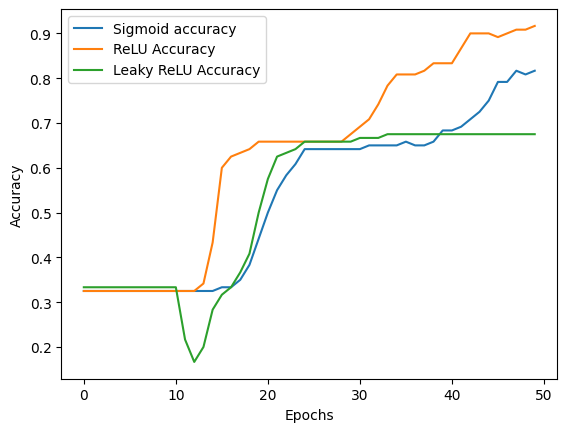

In [113]:
import matplotlib.pyplot as plt

plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid accuracy')

plt.plot(history_relu.history['accuracy'], label='ReLU Accuracy')

plt.plot(history_leaky_relu.history['accuracy'], label='Leaky ReLU Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()